In [1]:
from math import factorial
from math import exp, pi, sqrt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import truncnorm
import scipy


### Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [2]:
X = zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
Y = ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
X, Y

(array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]),
 array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]))

In [3]:
n = len(X)
n

10

In [4]:
stdX = X.std(ddof=1) # Несмещенная дисперсия
stdX

62.31318747531162

In [5]:
varX = X.var(ddof=1)
varX

3882.9333333333334

In [6]:
stdY = Y.std(ddof=1)
stdY

183.99544076477068

In [7]:
varY = Y.var(ddof=1)
varY

33854.32222222223

In [8]:
XY_cov_m = np.cov(X, Y, ddof=1)
XY_cov_m

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

In [9]:
t1 = 0  ## К-т корреляции
t2 = 0
t3 = 0
c = 0 
k = 0
for i in range(0,len(X)):
    t1 = t1 + (X[i]-X.mean())*(Y[i]-Y.mean())
    t2 = t2 +  (X[i]-X.mean())**2
    t3 = t3 +  (Y[i]-Y.mean())**2
k = t1/np.sqrt(t2*t3)
c = t1 / len(X) -1
print('R-n  корреляции',k, 'Ковариация смещенная', c)   # с - на смещенной 

R-n  корреляции 0.8874900920739162 Ковариация смещенная 9156.84


In [10]:
VAL = np.vstack((X, Y))
R_xy_m = np.corrcoef(VAL)
R_xy_m

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [11]:
R_xy = c/(stdX*stdY)
R_xy

0.7986538634913372

In [12]:
a = R_xy/stdX*stdY
a

2.3582274569054325

In [13]:
a = np.cov(X, Y, ddof=0)[0, 1] / np.var(X, ddof=0)
a

2.6205388824027653

In [14]:
b = Y.mean()-a*X.mean()
b

444.17735732435955

In [15]:
a = (np.mean(X*Y)-np.mean(X)*np.mean(Y))/(np.mean(X**2)-np.mean(X)**2)
b = np.mean(Y)-a*np.mean(X)
a,b

(2.620538882402765, 444.1773573243596)

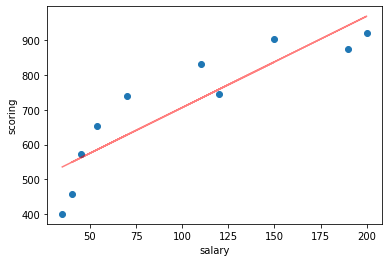

In [16]:
ox = X
oy =  a * X +b

plt.scatter(X, Y)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

In [17]:
n=len(Y)
a = (np.sum(X)*np.sum(Y) - n*np.sum(X*Y))/(np.sum(X)*np.sum(X) - n*np.sum(X*X))
b = (np.sum(Y) - a*np.sum(X))/n
A = np.vstack((X, np.ones(len(X)))).T
a1, b1 = np.linalg.lstsq(A, Y, rcond=None)[0]  # метод наименьших квадратов 
print(a, b)
print(a1, b1)

2.6205388824027653 444.1773573243596
2.6205388824027653 444.17735732435966


__Средняя ошибка апроксимации__:
$$\overline{A} = \frac{1}{n} \sum\limits_{i=1}^{n} \Bigl |{{\frac{y_i - \hat{y}_i}{y_i}} \Bigr |} \cdot{100\%}$$


In [18]:
A = 100/len(Y)*np.sum(np.abs((Y-oy)/Y))  # средняя ошибка апроксимации
A

11.46925184356171

In [19]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [20]:
mean_approximation_error(Y, oy)

0.11469251843561709

__Коэффициент детерминации__:
$$R^2 = 1 - \dfrac{\sigma^2_{res}}{\sigma^2_{y}}$$


In [21]:
R1 = 1 - (oy - Y).var() / Y.var()
R1

0.7876386635293686

In [22]:
np.corrcoef(Y, oy) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

**Стандартная ошибка** $s_{ост}$ рассчитывается по формуле:
$$S_{ост} = \sqrt{\frac{\sum\limits_{i=1}^{n}(y_i - \hat{y}_i)^2}{n - 2}}$$

In [23]:
# Стандартная ошибка   апроксимации
Est = np.sqrt(np.sum((Y-oy)**2)/(n-2))
Est

89.93340731602925

### Оценка значимости уравнения линейной регрессии

Оценить статистическую значимость уравнения линейной регрессии в целом можно с помощью __F-критерия Фишера__. Проверяется нулевая гипотеза о том, что все коэффициенты при факторах у регрессионной модели равны нулю (т.е. модель представляет из себя горизонтальную плоскость.)

In [24]:
f1 = 1
f2 = n-f1-1

In [25]:
# F-критерий Фишера позволяет оценить значимость уравнения линейной регрессии в целом. Определим по таблице f1=2 f2 =7

Fcr = 5.31


In [26]:
from scipy import stats
F_crit = stats.f.ppf(1 - 0.05, f1, f2)
F_crit

5.317655071578714

In [27]:
Ffact = R1/f1/((1-R1)/f2)
Ffact

29.67164085966451

При  парной регрессии с помощью t-распределения Стьюдента можно построить доверительные интервалы для коэффициентов регрессии.

Построим доверительный интервал коэффициента наклона $b_1$ (из уравнения $y = b_0 + b_1 \cdot x$). Нам понадобится значение __стандартной ошибки коэффициента наклона__. Она вычисляется по формуле:
$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$$
где:
* $x$, $x_i$ — соответственно, все значения и конкретное значение фактора
* $y_i$ — конкретное значение оцениваемой (целевой) переменной
* $z_i$ — «предсказанное» значение, полученное с помощью модели регрессии
* $n$ — число элементов в выборке


In [28]:
Ssl = np.sqrt(1/n-2*(np.sum(Y-oy)**2)/np.sum((X-X.mean()**2)))
Ssl

0.31622776601683794

Пусть $b_1$ — реальное значение этого коэффициента. Тогда статистика
$$T = \dfrac{\hat{b}_1 - b_1}{S_{slope}}$$
имеет распределение Стьюдента с $n - 2$ степенями свободы. Для выбранного нами уровня доверия $p = 1 - \alpha$ доверительный интервал выглядит следующим образом:
$$P \left( \hat{b}_1 - t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \leq b_1 \leq \hat{b}_1 + t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \right) = p$$


In [29]:
t = scipy.stats.t.ppf(0.975, n-2) #статистика T
t

2.3060041350333704

In [30]:
#Тогда интервал:
da = (a-t*Ssl, a+t*Ssl)
da

(1.891316346355572, 3.3497614184499587)

Аналогично можно построить доверительный интервал для коэффициента сдвига $b_0$. __Стандартная ошибка коэффициента сдвига__ вычисляется по формуле:
$$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}.$$

In [31]:
Sin = np.sqrt(1/n*np.sum(X**2))
Sin

117.37376197430157

In [32]:
db = (b-t*Ssl, b+t*Ssl)
db

(443.4481347883124, 444.9065798604068)

#### Задача 2

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

In [33]:
X = {"1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0]}
Y = {"1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]}

По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они практически не отличаются, постройте scatter plot по каждой паре выборок

1 : 9.0 7.5 10.0 3.752 0.5000909090909091 3.000090909090908 (0.8164205163448399, 0.0021696288730787927)
2 : 9.0 7.5 10.0 3.752 0.49999999999999994 3.000909090909089 (0.8162365060002427, 0.0021788162369108027)
3 : 9.0 7.5 10.0 3.748 0.4997272727272728 3.002454545454544 (0.8162867394895982, 0.002176305279228025)
4 : 9.0 7.5 10.0 3.748 0.4999090909090907 3.001727272727273 (0.8165214368885029, 0.002164602347197218)


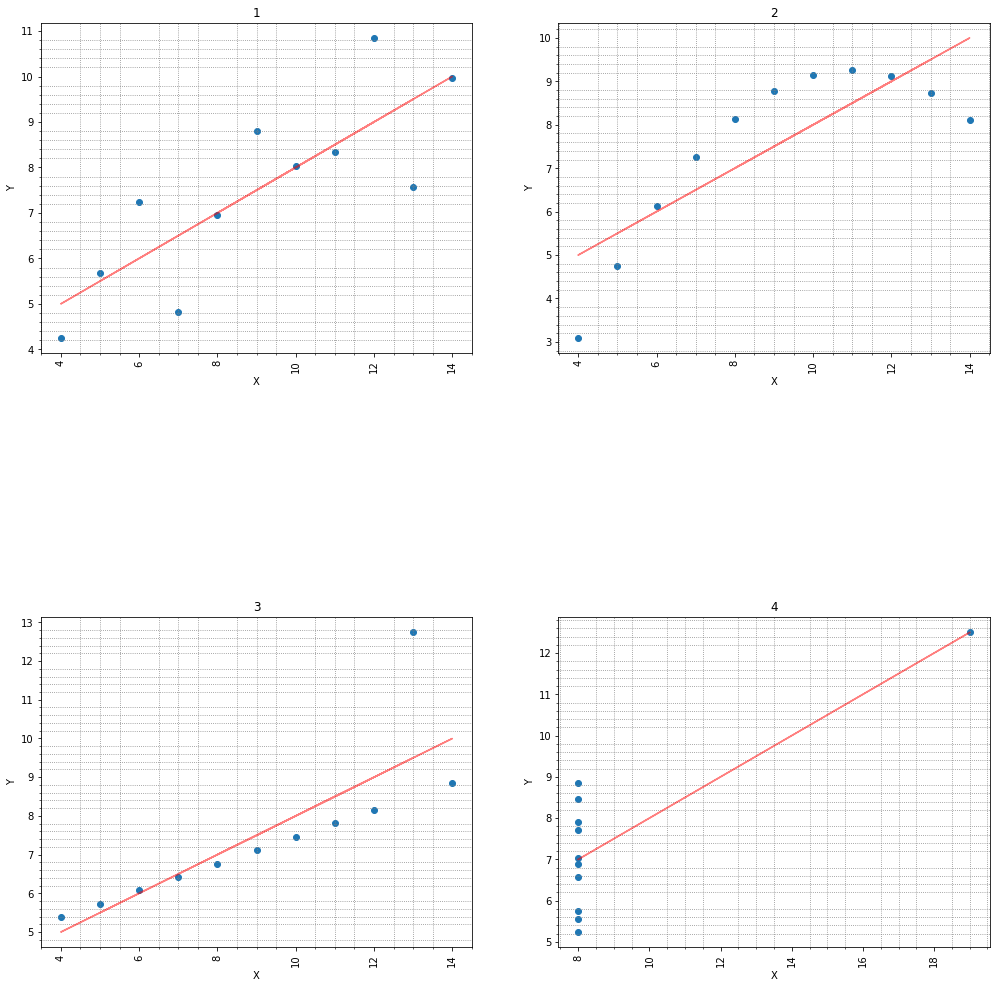

In [34]:
keys = X.keys()
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(17, 17)
plt.subplots_adjust(wspace=0.2, hspace=0.8)
for key, ax in zip(keys, axes.flatten()):
    xx = np.array(X[key])
    yy = np.array(Y[key])
    m_X = xx.mean()
    m_Y = yy.mean()
    var_X = xx.var()
    var_Y = yy.var()
    A = np.vstack((xx, np.ones(len(xx)))).T
    a, b = np.linalg.lstsq(A, yy, rcond=None)[0]
    pirs=stats.pearsonr(xx, yy)
    ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               labelrotation = 90)    #  Поворот подписей
    ax.minorticks_on()
    ax.grid(which='minor',
        color = 'gray',
        linestyle = ':')
    ax.scatter(xx, yy)
    ax.plot(xx, a *xx +b, color='red', alpha=0.5)
    ax.set_title(key)
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    print(key,':', m_X, np.round(m_Y,2),np.round( var_X,3), np.round(var_Y,3), a, b, pirs)